In [1]:
import matplotlib.pyplot as plt

def MakePlot(simData, checkData, simCaseLabel):
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(1, 1, 1)
    ax1.plot(checkData['time'], checkData[simCaseLabel],'g', 
             simData.time, simData.ImperialData[simCaseLabel], 'b')
    ax1.set(xlabel='time (s)', ylabel=simCaseLabel, title=simCaseLabel)
    ax1.legend(["NESC","pierpont"])

In [2]:
from pierpont import util
util.CheckFrechet()

----> Frechet Test Results <----
 passed tests:  3
 failed tests:  0


## 1: Dragless sphere

In [3]:
%%time
from pierpont import ppont
from pierpont import util
#
ic = {
    "altitudeMsl": [30000, "ft"]
}
gvOblateRotatingEarth = ppont.slEarthSim('models/sphere_dragless.dml')
gvOblateRotatingEarth.Reset(ic)
gvOblateRotatingEarth.Run(30.0)

*******************************************
Model:  Dragless Sphere
creation date:  2022-12-28
file version:  Initial version
*******************************************

+++++ MODEL INPUTS AND OUTPUTS +++++
++++++++++++++++++++++++++++++++++++

----- DAVE-ML MODEL PARSE COMPLETE -----
========= SetIC ==============
{'altitudeMsl': 9144.0}
++ timeStep = 0.1 [default]
++ totalMass = 14.593902937 [DML model]
++ referenceWingSpan = 0 [default]
++ referenceWingChord = 0 [default]
++ referenceWingArea = 0 [default]
++ totalCoefficientOfLift = 0 [default]
++ totalCoefficientOfDrag = 0 [default]
++ trueAirspeed = 0 [default]
++ angleOfAttack = 0 [default]
++ angleOfSideslip = 0 [default]
Vuvw:  (0.0, 0.0, 0.0)
++ eulerAngle_Roll = 0 [default]
++ eulerAngle_Pitch = 0 [default]
++ eulerAngle_Yaw = 0 [default]
++ eulerAngleRate_Roll = 0 [default]
++ eulerAngleRate_Pitch = 0 [default]
++ eulerAngleRate_Yaw = 0 [default]
++ bodyMomentOfInertia_X = 4.88094466281336 [DML model]
++ bodyProductOfInert

### Check

In [4]:
gvOblateRotatingEarth.GenerateImperialUnits()
#
checkFile = (
    "NESC-check-cases/Atmospheric_checkcases/Atmos_01_DroppedSphere/"
    "Atmos_01_sim_01.csv"
)
gvCC1 = util.GetNESCData(checkFile)
#
gvOblateEarthLabel = \
[
    'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 
    'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 
    'eulerAngle_deg_Roll', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Yaw',
    'speedOfSound_ft_s'
]
#
util.PrintErrorTable("Dragless Sphere: Oblate Earth", gvOblateEarthLabel, 
                     gvOblateRotatingEarth, gvCC1)

number of headers:  31
['time', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 'aero_bodyMoment_ftlbf_N', 'mach', 'dynamicPressure_lbf_ft2', 'trueAirspeed_nmi_h']
Dragless Sphere: Oblate Earth
Variable                  L2      L-Infinity-Norm
--------                  --      ---------------
altitudeMsl_ft            0.133   0.02           
longitude_deg             0.0     0.0            
latitude_deg              0.0     0

## 2: Dragless tumbling brick

In [5]:
%%time
ic = {
    "altitudeMsl": [30000, "ft"],
    "eulerAngleRate_Roll": [10, "deg_s"],
    "eulerAngleRate_Pitch": [20, "deg_s"],
    "eulerAngleRate_Yaw": [30, "deg_s"]
}
gvOblateRotatingEarth = ppont.slEarthSim('models/brick_dragless.dml')
gvOblateRotatingEarth.Reset(ic)
gvOblateRotatingEarth.Run(30.0)

*******************************************
Model:  Brick Model
creation date:  2022-12-28
file version:  Initial version
*******************************************

+++++ MODEL INPUTS AND OUTPUTS +++++
++++++++++++++++++++++++++++++++++++

----- DAVE-ML MODEL PARSE COMPLETE -----
========= SetIC ==============
{'altitudeMsl': 9144.0, 'eulerAngleRate_Roll': 0.17453292519943295, 'eulerAngleRate_Pitch': 0.3490658503988659, 'eulerAngleRate_Yaw': 0.5235987755982988}
++ timeStep = 0.1 [default]
++ totalMass = 2.2679618958243624 [DML model]
++ referenceWingSpan = 0 [default]
++ referenceWingChord = 0 [default]
++ referenceWingArea = 0 [default]
++ totalCoefficientOfLift = 0 [default]
++ totalCoefficientOfDrag = 0 [default]
++ trueAirspeed = 0 [default]
++ angleOfAttack = 0 [default]
++ angleOfSideslip = 0 [default]
Vuvw:  (0.0, 0.0, 0.0)
++ eulerAngle_Roll = 0 [default]
++ eulerAngle_Pitch = 0 [default]
++ eulerAngle_Yaw = 0 [default]
++ eulerAngleRate_Roll = 0.17453292519943295 [IC case]
+

### Check

In [6]:
gvOblateRotatingEarth.GenerateImperialUnits()
#
checkFile = (
    "NESC-check-cases/Atmospheric_checkcases/Atmos_02_TumblingBrickNoDamping/"
    "Atmos_02_sim_01.csv"
)
gvCC2 = util.GetNESCData(checkFile)
#
util.PrintErrorTable("Dragless Tumbling Brick: Oblate Earth", gvOblateEarthLabel, 
                    gvOblateRotatingEarth, gvCC2)

number of headers:  31
['time', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 'aero_bodyMoment_ftlbf_N', 'mach', 'dynamicPressure_lbf_ft2', 'trueAirspeed_nmi_h']
Dragless Tumbling Brick: Oblate Earth
Variable                  L2      L-Infinity-Norm
--------                  --      ---------------
altitudeMsl_ft            0.133   0.02           
longitude_deg             0.0     0.0            
latitude_deg              0

## 3: Tumbling brick with damping

In [7]:
%%time
ic = {
    "altitudeMsl": [30000, "ft"],
    "eulerAngleRate_Roll": [10, "deg_s"],
    "eulerAngleRate_Pitch": [20, "deg_s"],
    "eulerAngleRate_Yaw": [30, "deg_s"]
}
#
inputs = ["trueAirspeed", 
          "bodyAngularRate_Roll", "bodyAngularRate_Pitch", "bodyAngularRate_Yaw"]
#
gvOblateRotatingEarth = ppont.slEarthSim('models/brick_damping.dml')
gvOblateRotatingEarth.Reset(ic)
gvOblateRotatingEarth.AddAeroModelInput(inputs)
gvOblateRotatingEarth.Run(30.0)

*******************************************
Model:  Brick Model with Damping
creation date:  2022-12-25
file version:  Initial
*******************************************

+++++ MODEL INPUTS AND OUTPUTS +++++
++> Input:  trueAirspeed
++> Input:  bodyAngularRate_Roll
++> Input:  bodyAngularRate_Pitch
++> Input:  bodyAngularRate_Yaw
++> Output:  aeroBodyMomentCoefficient_Roll
++> Output:  aeroBodyMomentCoefficient_Pitch
++> Output:  aeroBodyMomentCoefficient_Yaw
++++++++++++++++++++++++++++++++++++

----- DAVE-ML MODEL PARSE COMPLETE -----
========= SetIC ==============
{'altitudeMsl': 9144.0, 'eulerAngleRate_Roll': 0.17453292519943295, 'eulerAngleRate_Pitch': 0.3490658503988659, 'eulerAngleRate_Yaw': 0.5235987755982988}
++ timeStep = 0.1 [default]
++ totalMass = 2.2679618958243624 [DML model]
++ referenceWingSpan = 0.101598984 [DML model]
++ referenceWingChord = 0.203201016 [DML model]
++ referenceWingArea = 0.020644913548800003 [DML model]
++ totalCoefficientOfLift = 0 [default]
++ tot

### Check

In [8]:
gvOblateRotatingEarth.GenerateImperialUnits()
#
checkFile = (
    "NESC-check-cases/Atmospheric_checkcases/Atmos_03_TumblingBrickDamping/"
    "Atmos_03_sim_01.csv"
)
gvCC3 = util.GetNESCData(checkFile)
#
util.PrintErrorTable("Tumbling Brick Damping: Oblate Earth", gvOblateEarthLabel, 
                    gvOblateRotatingEarth, gvCC3)

number of headers:  31
['time', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 'aero_bodyMoment_ftlbf_N', 'mach', 'dynamicPressure_lbf_ft2', 'trueAirspeed_nmi_h']
Tumbling Brick Damping: Oblate Earth
Variable                  L2      L-Infinity-Norm
--------                  --      ---------------
altitudeMsl_ft            0.141   0.022          
longitude_deg             0.0     0.0            
latitude_deg              0.

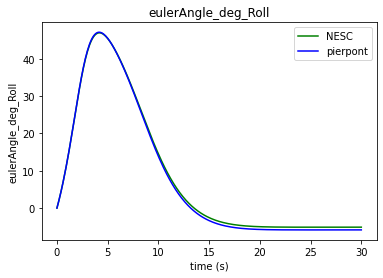

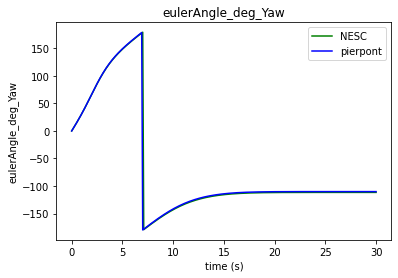

In [9]:
MakePlot(gvOblateRotatingEarth, gvCC3, 'eulerAngle_deg_Roll')
MakePlot(gvOblateRotatingEarth, gvCC3, 'eulerAngle_deg_Yaw')

## 6: Sphere dropping over rotating, ellipsoidal Earth

In [10]:
%%time
#
ic = {
    "altitudeMsl": [30000, "ft"]
}
#
inputs = ["angleOfAttack"]
gvOblateRotatingEarth = ppont.slEarthSim('models/sphere_aero.dml')
gvOblateRotatingEarth.Reset(ic)
gvOblateRotatingEarth.AddAeroModelInput(inputs)
gvOblateRotatingEarth.Run(30)

*******************************************
Model:  Example cannonball aerodynamic model
creation date:  2022-12-31
file version:  Inital Version
*******************************************

+++++ MODEL INPUTS AND OUTPUTS +++++
++> Input:  angleOfAttack
++> Output:  aeroBodyForceCoefficient_X
++> Output:  aeroBodyForceCoefficient_Y
++> Output:  aeroBodyForceCoefficient_Z
++++++++++++++++++++++++++++++++++++

----- DAVE-ML MODEL PARSE COMPLETE -----
========= SetIC ==============
{'altitudeMsl': 9144.0}
++ timeStep = 0.1 [default]
++ totalMass = 14.593902937 [DML model]
++ referenceWingSpan = 0 [default]
++ referenceWingChord = 0 [default]
++ referenceWingArea = 0.018241465452480003 [DML model]
++ totalCoefficientOfLift = 0 [default]
++ totalCoefficientOfDrag = 0.1 [DML model]
++ trueAirspeed = 0 [default]
++ angleOfAttack = 0.0 [DML model]
++ angleOfSideslip = 0 [default]
Vuvw:  (0.0, 0.0, 0.0)
++ eulerAngle_Roll = 0 [default]
++ eulerAngle_Pitch = 0 [default]
++ eulerAngle_Yaw = 0 [de

### Check

In [11]:
gvOblateRotatingEarth.GenerateImperialUnits()
#
checkFile = (
    "NESC-check-cases/Atmospheric_checkcases/Atmos_06_DroppedSphereEllipsoidalNoWind/"
    "Atmos_06_sim_01.csv"
)
gvCC6 = util.GetNESCData(checkFile)
#
gvOblateEarthLabel = \
[
    'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 
    'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 
    'eulerAngle_deg_Roll', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Yaw',
    'trueAirspeed_nmi_h', 'speedOfSound_ft_s',
    'aero_bodyForce_lbf_X' , 'aero_bodyForce_lbf_Y' , 'aero_bodyForce_lbf_Z'
]
#
util.PrintErrorTable("Dropped Sphere (Cd=0.1): Oblate Earth", gvOblateEarthLabel, 
                    gvOblateRotatingEarth, gvCC6)

number of headers:  31
['time', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 'aero_bodyMoment_ftlbf_N', 'mach', 'dynamicPressure_lbf_ft2', 'trueAirspeed_nmi_h']
Dropped Sphere (Cd=0.1): Oblate Earth
Variable                  L2      L-Infinity-Norm
--------                  --      ---------------
altitudeMsl_ft            36.133  5.845          
longitude_deg             0.0     0.0            
latitude_deg              0

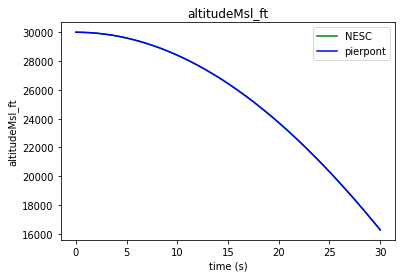

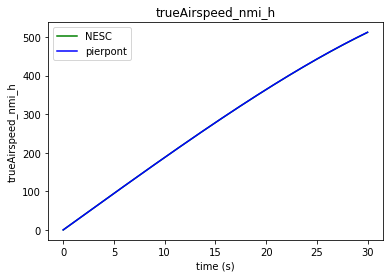

In [12]:
MakePlot(gvOblateRotatingEarth, gvCC6, 'altitudeMsl_ft')
MakePlot(gvOblateRotatingEarth, gvCC6, 'trueAirspeed_nmi_h')

## Stevens and Lewis Orbit

In [13]:
%%time
import matplotlib.pyplot as plt
#
ic = {
    "timeStep": [1.0, "s"],
    "altitudeMsl": [100000.0, "m"],
    "trueAirspeed": [9000.0, "m_s"]
}
#
gvOblateRotatingEarth = ppont.slEarthSim('models/sphere_dragless.dml')
gvOblateRotatingEarth.Reset(ic)
gvOblateRotatingEarth.Run(20000)

*******************************************
Model:  Dragless Sphere
creation date:  2022-12-28
file version:  Initial version
*******************************************

+++++ MODEL INPUTS AND OUTPUTS +++++
++++++++++++++++++++++++++++++++++++

----- DAVE-ML MODEL PARSE COMPLETE -----
========= SetIC ==============
{'timeStep': 1.0, 'altitudeMsl': 100000.0, 'trueAirspeed': 9000.0}
++ timeStep = 1.0 [IC case]
++ totalMass = 14.593902937 [DML model]
++ referenceWingSpan = 0 [default]
++ referenceWingChord = 0 [default]
++ referenceWingArea = 0 [default]
++ totalCoefficientOfLift = 0 [default]
++ totalCoefficientOfDrag = 0 [default]
++ trueAirspeed = 9000.0 [IC case]
++ angleOfAttack = 0 [default]
++ angleOfSideslip = 0 [default]
Vuvw:  (9000.0, 0.0, 0.0)
++ eulerAngle_Roll = 0 [default]
++ eulerAngle_Pitch = 0 [default]
++ eulerAngle_Yaw = 0 [default]
++ eulerAngleRate_Roll = 0 [default]
++ eulerAngleRate_Pitch = 0 [default]
++ eulerAngleRate_Yaw = 0 [default]
++ bodyMomentOfInertia_X =

### Check

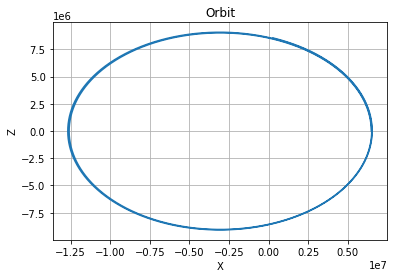

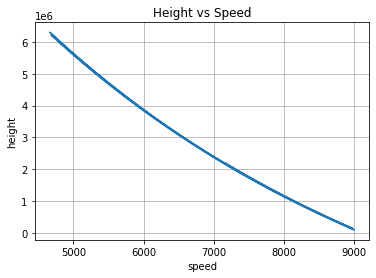

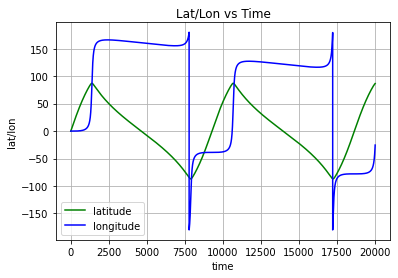

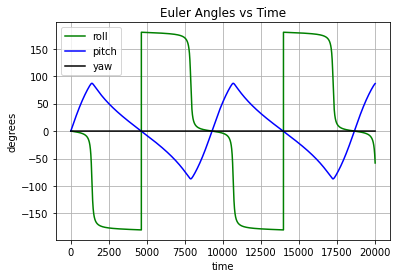

In [14]:
gvOblateRotatingEarth.GenerateImperialUnits()
#
fig1, a = plt.subplots()
a.plot(gvOblateRotatingEarth.eiPosition_m_X, gvOblateRotatingEarth.eiPosition_m_Z)
a.set(xlabel='X', ylabel='Z', title='Orbit')
a.grid()

fig2, b = plt.subplots()
b.plot(gvOblateRotatingEarth.trueAirspeed, gvOblateRotatingEarth.altitudeMsl_m)
b.set(xlabel='speed', ylabel='height', title='Height vs Speed')
b.grid()

fig3, c = plt.subplots()
c.plot(gvOblateRotatingEarth.time, gvOblateRotatingEarth.ImperialData['latitude_deg'],'g',
       gvOblateRotatingEarth.time, gvOblateRotatingEarth.ImperialData['longitude_deg'], 'b')
c.legend(["latitude","longitude"])
c.set(xlabel='time', ylabel='lat/lon', title='Lat/Lon vs Time')
c.grid()

fig4, d = plt.subplots()
d.plot(gvOblateRotatingEarth.time, gvOblateRotatingEarth.ImperialData['eulerAngle_deg_Roll'],'g',
       gvOblateRotatingEarth.time, gvOblateRotatingEarth.ImperialData['eulerAngle_deg_Pitch'], 'b',
       gvOblateRotatingEarth.time, gvOblateRotatingEarth.ImperialData['eulerAngle_deg_Yaw'], 'k')
d.legend(["roll","pitch","yaw"])
d.set(xlabel='time', ylabel='degrees', title='Euler Angles vs Time')
d.grid()

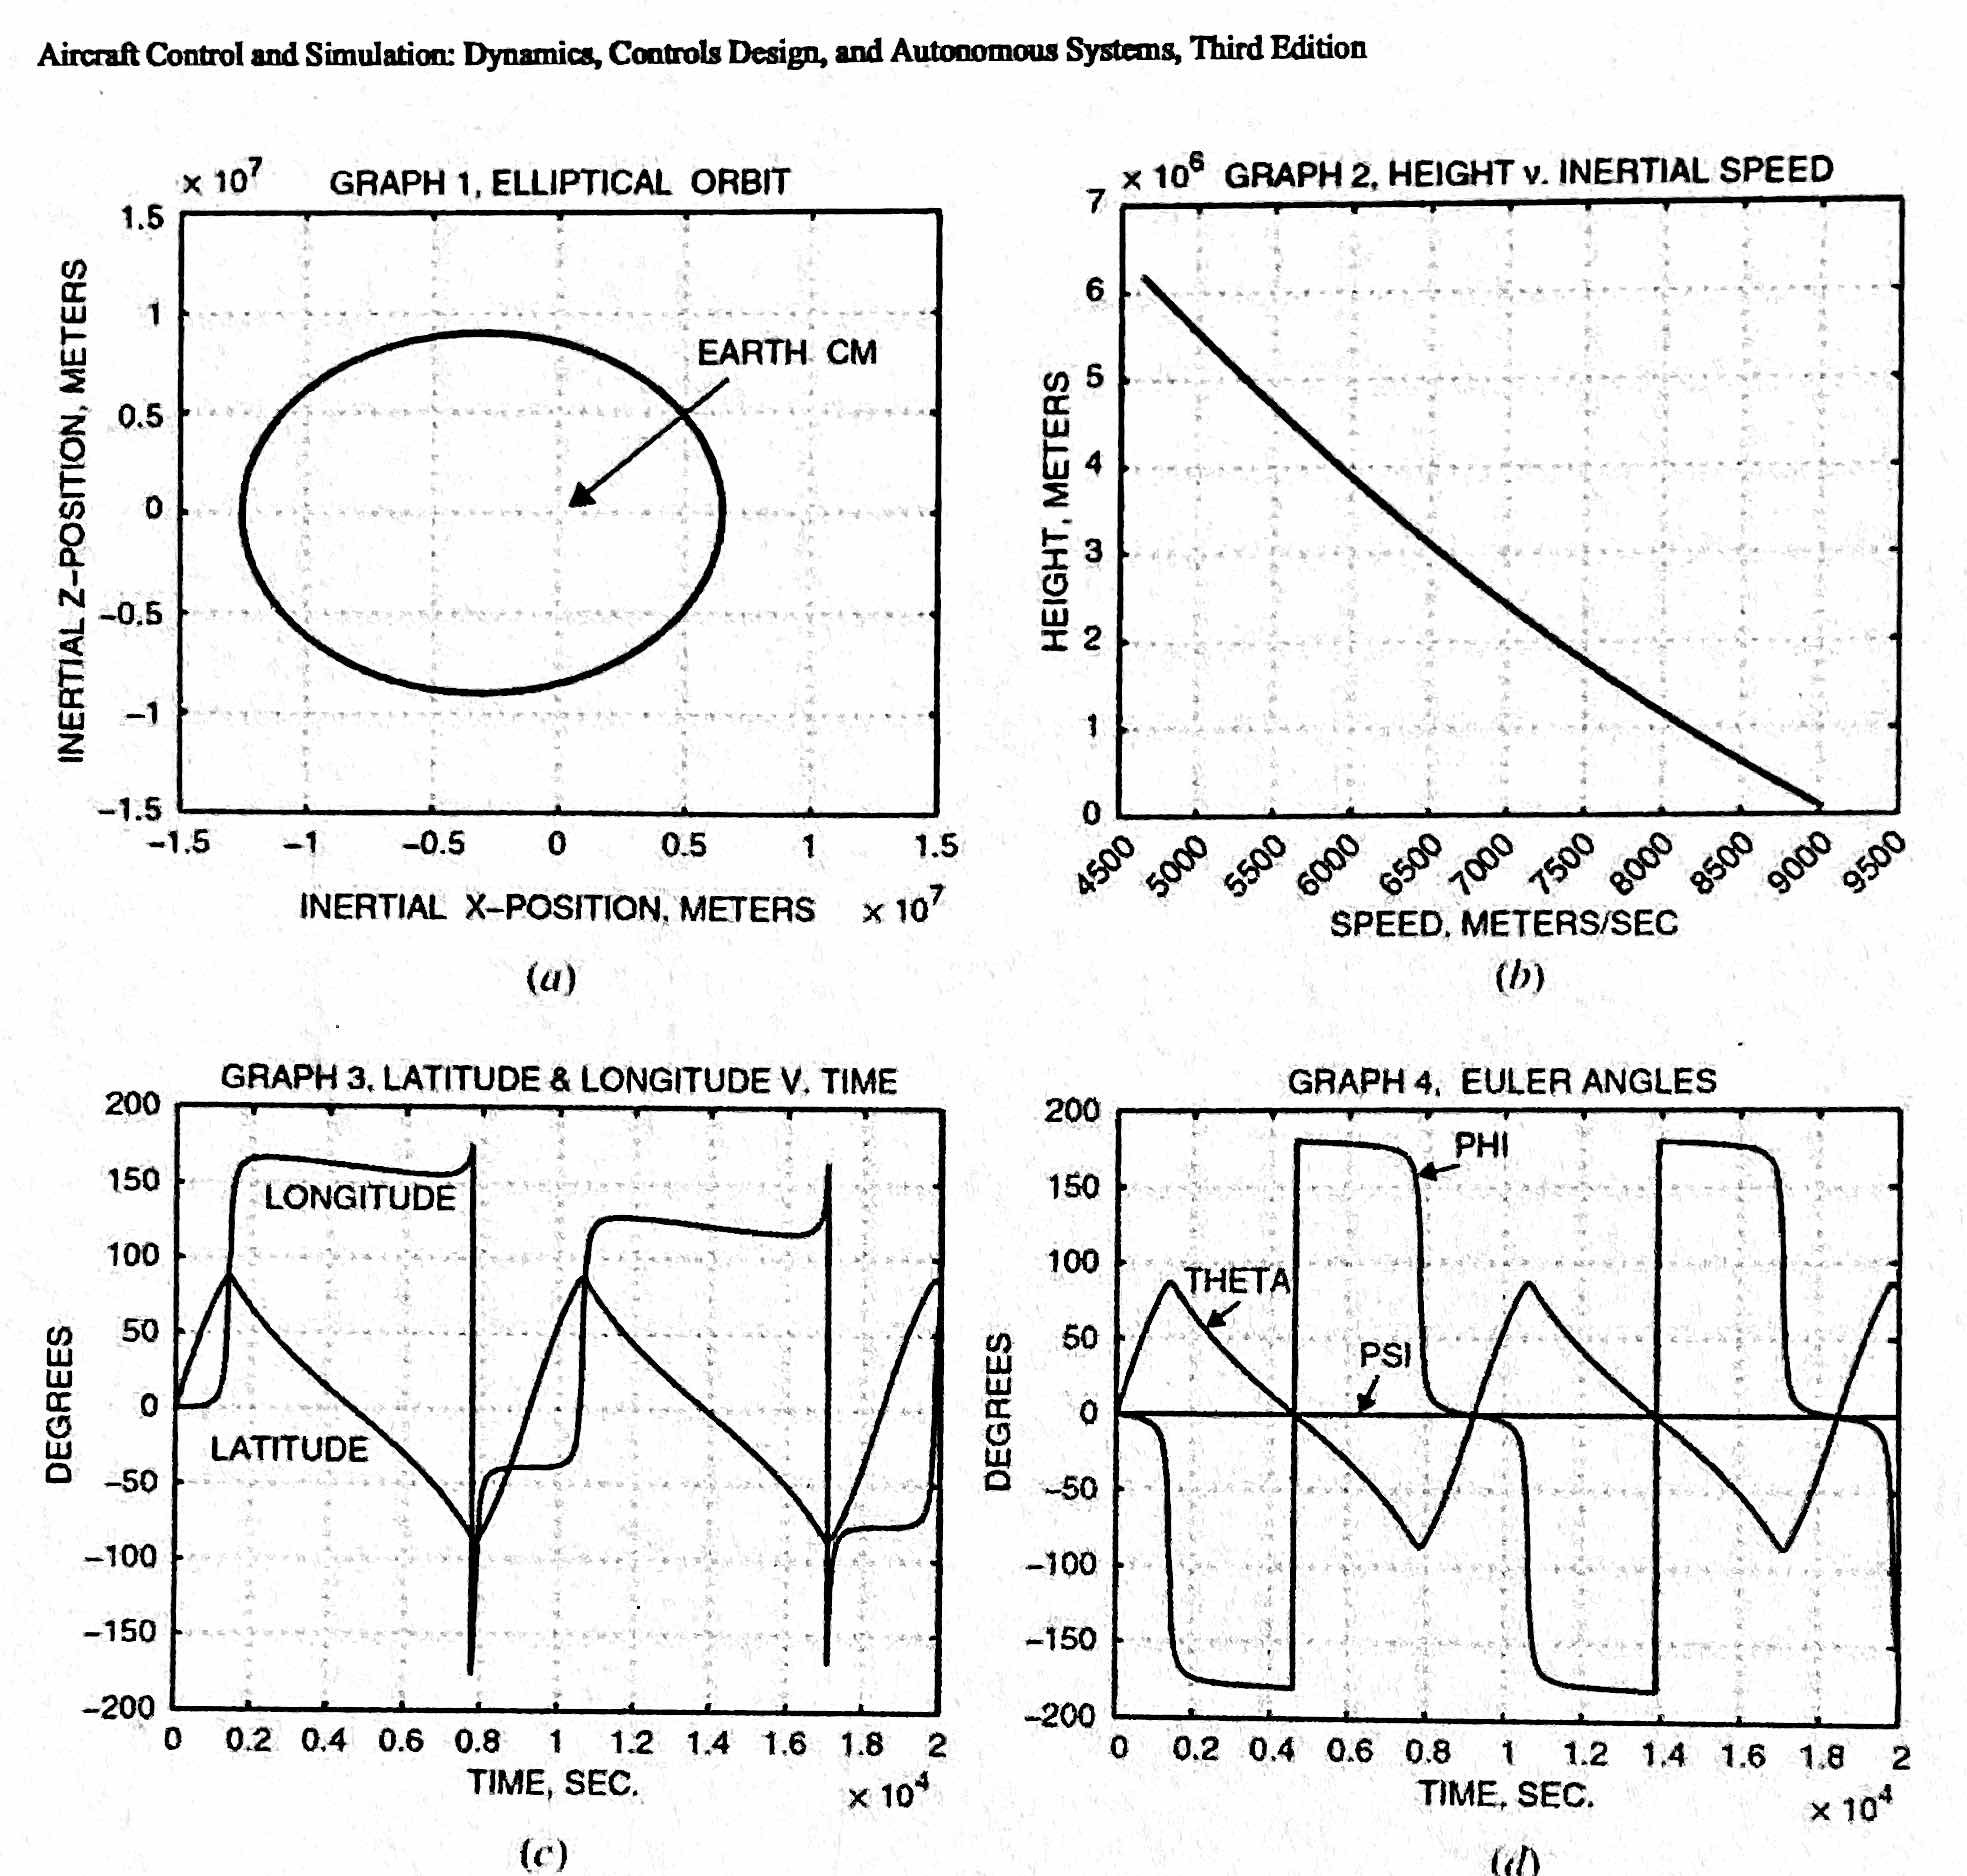

In [15]:
from IPython.display import Image
Image(filename= "images/SLOrbit.png", width=600, height=600)

## 9: Eastward firing ballistic sphere

In [16]:
%%time
#
# velocity: 0, 1000, -1000
#  1414.21356237
ic = {
    "trueAirspeed": [1414.21356237, "ft_s"],
    "angleOfAttack": [-45, "deg"],
    "eulerAngle_Yaw": [90, "deg"]
}
#
inputs = ["angleOfAttack"]
gvOblateRotatingEarth = ppont.slEarthSim('models/sphere_aero.dml')
gvOblateRotatingEarth.Reset(ic)
gvOblateRotatingEarth.AddAeroModelInput(inputs)
gvOblateRotatingEarth.Run(30)

*******************************************
Model:  Example cannonball aerodynamic model
creation date:  2022-12-31
file version:  Inital Version
*******************************************

+++++ MODEL INPUTS AND OUTPUTS +++++
++> Input:  angleOfAttack
++> Output:  aeroBodyForceCoefficient_X
++> Output:  aeroBodyForceCoefficient_Y
++> Output:  aeroBodyForceCoefficient_Z
++++++++++++++++++++++++++++++++++++

----- DAVE-ML MODEL PARSE COMPLETE -----
========= SetIC ==============
{'trueAirspeed': 431.05229381037606, 'angleOfAttack': -0.7853981633974483, 'eulerAngle_Yaw': 1.5707963267948966}
++ timeStep = 0.1 [default]
++ totalMass = 14.593902937 [DML model]
++ referenceWingSpan = 0 [default]
++ referenceWingChord = 0 [default]
++ referenceWingArea = 0.018241465452480003 [DML model]
++ totalCoefficientOfLift = 0 [default]
++ totalCoefficientOfDrag = 0.1 [DML model]
++ trueAirspeed = 431.05229381037606 [IC case]
++ angleOfAttack = -0.7853981633974483 [IC case]
++ angleOfSideslip = 0 [defa

### Check

In [17]:
gvOblateRotatingEarth.GenerateImperialUnits()
#
checkFile = (
    "NESC-check-cases/Atmospheric_checkcases/Atmos_09_EastwardCannonball/"
    "Atmos_09_sim_01.csv"
)
gvCC9 = util.GetNESCData(checkFile)
#
gvOblateEarthLabel = \
[
    'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 
    'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 
    'eulerAngle_deg_Roll', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Yaw',
    'trueAirspeed_nmi_h', 'speedOfSound_ft_s',
    'aero_bodyForce_lbf_X' , 'aero_bodyForce_lbf_Y' , 'aero_bodyForce_lbf_Z'
]
#
util.PrintErrorTable("East fired Sphere (Cd=0.1): Oblate Earth", gvOblateEarthLabel, 
                    gvOblateRotatingEarth, gvCC9)

number of headers:  31
['time', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 'aero_bodyMoment_ftlbf_N', 'mach', 'dynamicPressure_lbf_ft2', 'trueAirspeed_nmi_h']
East fired Sphere (Cd=0.1): Oblate Earth
Variable                  L2      L-Infinity-Norm
--------                  --      ---------------
altitudeMsl_ft            372.866 29.16          
longitude_deg             0.001   0.0            
latitude_deg            

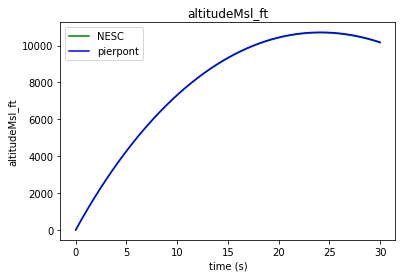

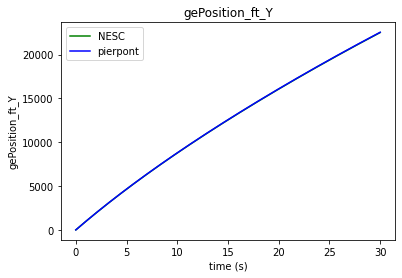

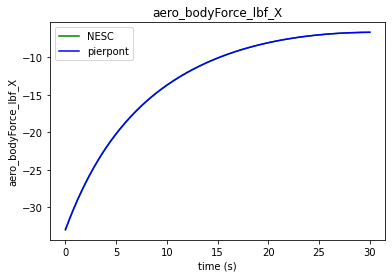

In [18]:
MakePlot(gvOblateRotatingEarth, gvCC9, 'altitudeMsl_ft')
MakePlot(gvOblateRotatingEarth, gvCC9, 'gePosition_ft_Y')
MakePlot(gvOblateRotatingEarth, gvCC9, 'aero_bodyForce_lbf_X')

## 10: Northward firing ballistic sphere

In [19]:
%%time
#
# velocity: 1000, 0, -1000
#  1414.21356237
ic = {
    "trueAirspeed": [1414.21356237, "ft_s"],
    "angleOfAttack": [-45, "deg"]
}
#
inputs = ["angleOfAttack"]
gvOblateRotatingEarth = ppont.slEarthSim('models/sphere_aero.dml')
gvOblateRotatingEarth.Reset(ic)
gvOblateRotatingEarth.AddAeroModelInput(inputs)
gvOblateRotatingEarth.Run(30)

*******************************************
Model:  Example cannonball aerodynamic model
creation date:  2022-12-31
file version:  Inital Version
*******************************************

+++++ MODEL INPUTS AND OUTPUTS +++++
++> Input:  angleOfAttack
++> Output:  aeroBodyForceCoefficient_X
++> Output:  aeroBodyForceCoefficient_Y
++> Output:  aeroBodyForceCoefficient_Z
++++++++++++++++++++++++++++++++++++

----- DAVE-ML MODEL PARSE COMPLETE -----
========= SetIC ==============
{'trueAirspeed': 431.05229381037606, 'angleOfAttack': -0.7853981633974483}
++ timeStep = 0.1 [default]
++ totalMass = 14.593902937 [DML model]
++ referenceWingSpan = 0 [default]
++ referenceWingChord = 0 [default]
++ referenceWingArea = 0.018241465452480003 [DML model]
++ totalCoefficientOfLift = 0 [default]
++ totalCoefficientOfDrag = 0.1 [DML model]
++ trueAirspeed = 431.05229381037606 [IC case]
++ angleOfAttack = -0.7853981633974483 [IC case]
++ angleOfSideslip = 0 [default]
Vuvw:  (304.799999999333, 0.0, -3

### Check

In [20]:
gvOblateRotatingEarth.GenerateImperialUnits()
#
checkFile = (
    "NESC-check-cases/Atmospheric_checkcases/Atmos_10_NorthwardCannonball/"
    "Atmos_10_sim_01.csv"
)
gvCC10 = util.GetNESCData(checkFile)
#
gvOblateEarthLabel = \
[
    'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 
    'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 
    'eulerAngle_deg_Roll', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Yaw',
    'trueAirspeed_nmi_h', 'speedOfSound_ft_s',
    'aero_bodyForce_lbf_X' , 'aero_bodyForce_lbf_Y' , 'aero_bodyForce_lbf_Z'
]
#
util.PrintErrorTable("North fired Sphere (Cd=0.1): Oblate Earth", gvOblateEarthLabel, 
                    gvOblateRotatingEarth, gvCC10)

number of headers:  31
['time', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 'aero_bodyMoment_ftlbf_N', 'mach', 'dynamicPressure_lbf_ft2', 'trueAirspeed_nmi_h']
North fired Sphere (Cd=0.1): Oblate Earth
Variable                  L2      L-Infinity-Norm
--------                  --      ---------------
altitudeMsl_ft            372.102 29.064         
longitude_deg             0.0     0.0            
latitude_deg           

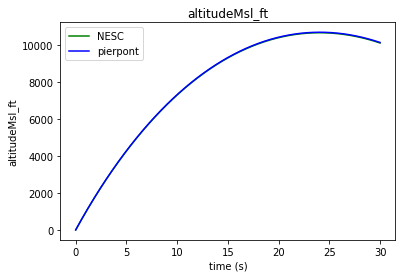

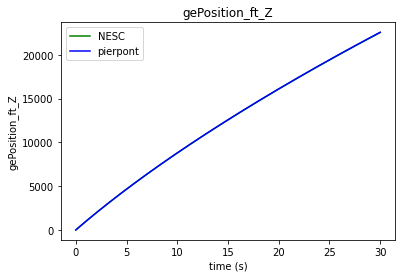

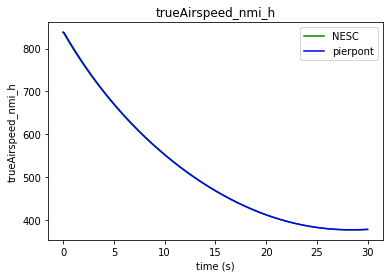

In [21]:
MakePlot(gvOblateRotatingEarth, gvCC10, 'altitudeMsl_ft')
MakePlot(gvOblateRotatingEarth, gvCC10, 'gePosition_ft_Z')
MakePlot(gvOblateRotatingEarth, gvCC10, 'trueAirspeed_nmi_h')

## 11: Steady subsonic flight of F-16

### F-16 model check

In [22]:
from pierpont import daveML

gvDaveModel = daveML.Model()
gvDaveModel.LoadDml('models/F16/F16_aero.dml')
gvDaveModel.CheckModel()

ERROR:root:internal: Positive sideslip -> [absCl0] Calculated 0.0, Expected -0.0056159999999999995
ERROR:root:internal: Positive sideslip -> [absCn0] Calculated 0.0, Expected 0.008891999999999999
ERROR:root:internal: Positive sideslip -> [clt] Calculated 0.0, Expected -0.0056159999999999995
ERROR:root:internal: Positive sideslip -> [cnt] Calculated 0.0, Expected 0.008891999999999999
ERROR:root:internal: Positive sideslip -> [dclda] Calculated -0.052, Expected -0.051297999999999996
ERROR:root:internal: Positive sideslip -> [dcldr] Calculated 0.014, Expected 0.013766
ERROR:root:internal: Positive sideslip -> [dcnda] Calculated -0.009, Expected -0.009701999999999999
ERROR:root:internal: Positive sideslip -> [dcndr] Calculated -0.045, Expected -0.044064
ERROR:root:internal: Positive sideslip -> [cl1] Calculated 0.0, Expected -0.0056159999999999995
ERROR:root:internal: Positive sideslip -> [cn1] Calculated 0.0, Expected 0.008891999999999999
ERROR:root:internal: Positive sideslip -> [cl] Cal

*******************************************
Model:  F-16 Subsonic Aerodynamics Model (a la Garza)
creation date:  2003-06-10
file version:  $ Revision: 394 $
*******************************************

-variableDef-
 varDefStruct.name:  trueAirspeed
 varDefStruct.varID:  vt
 varDefStruct.units:  ft_s
 varDefStruct.axisSystem:  None
 varDefStruct.sign:  None
 varDefStruct.alias:  None
 varDefStruct.symbol:  Vt
 varDefStruct.hasInitialValue:  False
 varDefStruct.initialValue:  None
 varDefStruct.isStdAIAA:  True
 varDefStruct.isOutput:  False
 varDefStruct.hasMath:  False
 varDefStruct.codeText:  None
-variableDef-
 varDefStruct.name:  angleOfAttack
 varDefStruct.varID:  alpha
 varDefStruct.units:  deg
 varDefStruct.axisSystem:  None
 varDefStruct.sign:  None
 varDefStruct.alias:  None
 varDefStruct.symbol:  α
 varDefStruct.hasInitialValue:  False
 varDefStruct.initialValue:  None
 varDefStruct.isStdAIAA:  True
 varDefStruct.isOutput:  False
 varDefStruct.hasMath:  False
 varDefStruct.c

ERROR:root:output: Negative elevator -> [aeroXBodyForceCoefficient] Calculated -0.063, Expected -0.02422
ERROR:root:output: Negative elevator -> [aeroPitchBodyMomentCoefficient] Calculated 0.1642192, Expected 0.08481253333333
ERROR:root:internal: Skewed inputs -> [cxt] Calculated 0.094, Expected 0.08915927333333333
ERROR:root:internal: Skewed inputs -> [czt] Calculated -1.053, Expected -1.12812
ERROR:root:internal: Skewed inputs -> [cz1] Calculated -1.0843419673257337, Expected -1.1592217522084587
ERROR:root:internal: Skewed inputs -> [absCl0] Calculated 0.0, Expected -0.014256
ERROR:root:internal: Skewed inputs -> [absCn0] Calculated 0.0, Expected 0.0108864
ERROR:root:internal: Skewed inputs -> [clt] Calculated -0.0, Expected 0.014256
ERROR:root:internal: Skewed inputs -> [cmt] Calculated 0.01, Expected -0.03276327333333335
ERROR:root:internal: Skewed inputs -> [cnt] Calculated -0.0, Expected -0.0108864
ERROR:root:internal: Skewed inputs -> [cxq] Calculated 2.91, Expected 2.874
ERROR:


----- END CheckModel -----



### F-16 simulation

In [23]:
%%time
#
# 36.01916667, -75.67444444, 10013
ic = {
    "trueAirspeed": [335.15, "kt"],
    "angleOfAttack": [0, "deg"],
    "eulerAngle_Yaw": [45, "deg"],
    "latitude": [36.01916667, "deg"],
    "longitude": [-75.67444444, "deg"],
    "altitudeMsl": [10013, "ft"]
}
#
#gvOblateRotatingEarth = ppont.slEarthSim('models/F16/F16_aero.dml')
#gvOblateRotatingEarth.Reset(ic)
#gvOblateRotatingEarth.Run(180)

CPU times: user 17 µs, sys: 1 µs, total: 18 µs
Wall time: 27.2 µs


### Check

In [24]:
#gvOblateRotatingEarth.GenerateImperialUnits()
#
checkFile = (
    "NESC-check-cases/Atmospheric_checkcases/Atmos_11_TrimCheckSubsonicF16/"
    "Atmos_11_sim_02.csv"
)
gvCC11 = util.GetNESCData(checkFile)
#

number of headers:  27
['time', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 'aero_bodyMoment_ftlbf_N', 'mach', 'trueAirspeed_nmi_h']
